<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Dela_Farahita_Zain_Modul_10_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Dela Farahita Zain
# NIM: 2241720058
# Kelas: D4 TI / 3B

1.  Import folder yang ada di Drive

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

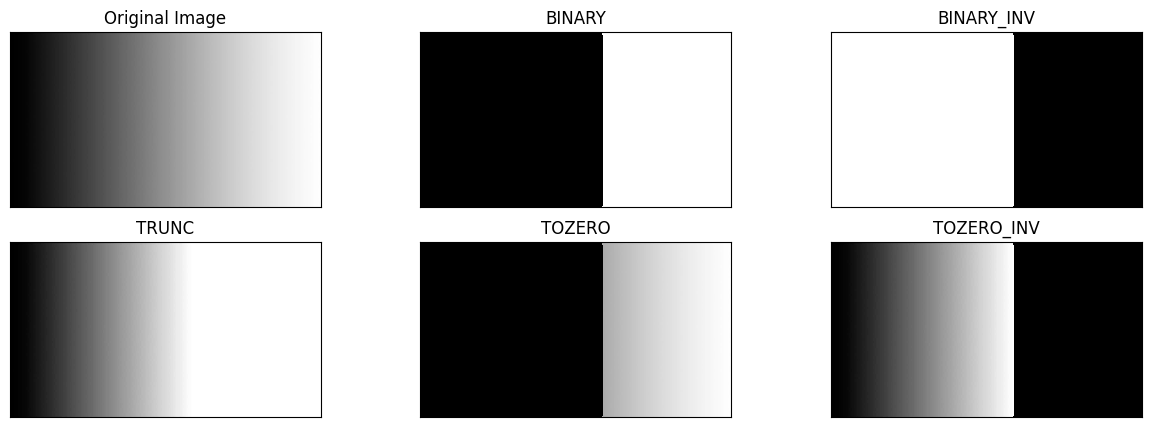

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
filename = '/content/drive/MyDrive/PCVK_Ganjil_2024/Modul10/gradient.jpg'

# Load the image in grayscale
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Set the threshold value
thresh = 170

# Apply different types of thresholding
# 1. Binary Threshold
ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)

# 2. Binary Threshold Inverse
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)

# 3. Truncate Threshold
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)

# 4. Tozero Threshold
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)

# 5. Tozero Inverse Threshold
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

# List of titles and images for displaying
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Plot the images
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon. jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

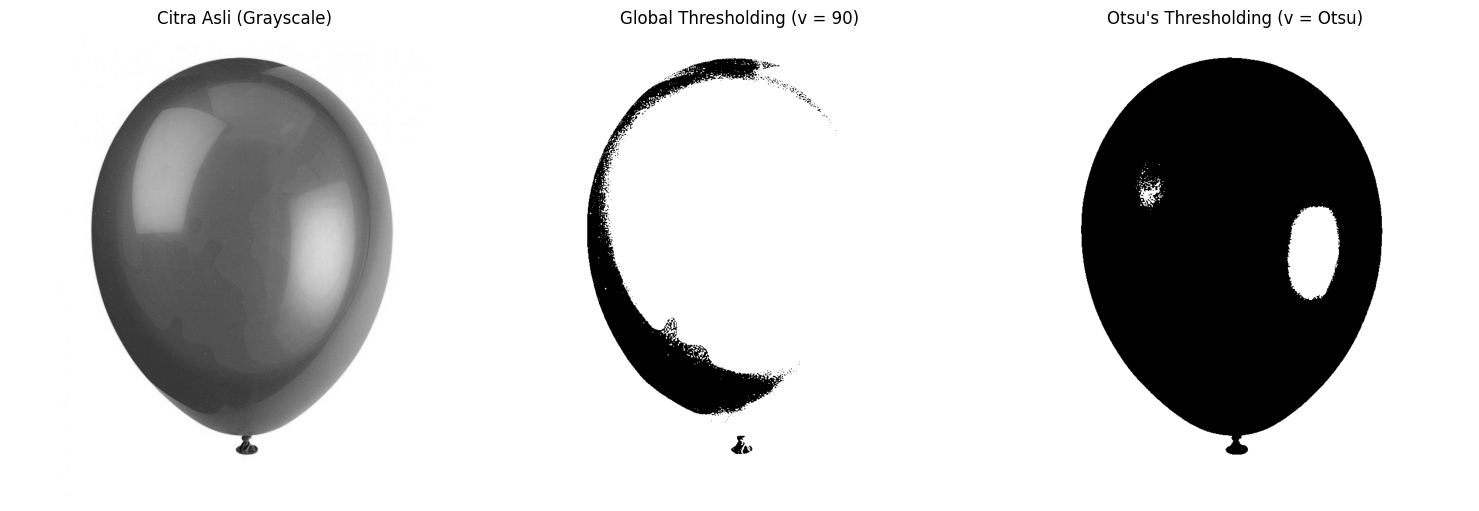

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and convert to grayscale
img = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul10/balloon.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Global Thresholding
global_thresh_value = 90
_, global_thresh = cv.threshold(gray, global_thresh_value, 255, cv.THRESH_BINARY)

# Otsu's Thresholding
_, otsu_thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Visualisasi
plt.figure(figsize=(15, 5))

# Gambar Asli (Grayscale)
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Asli (Grayscale)')
plt.axis('off')

# Global Thresholding
plt.subplot(1, 3, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding (v = 90)')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding (v = Otsu)")
plt.axis('off')

plt.tight_layout()
plt.show()


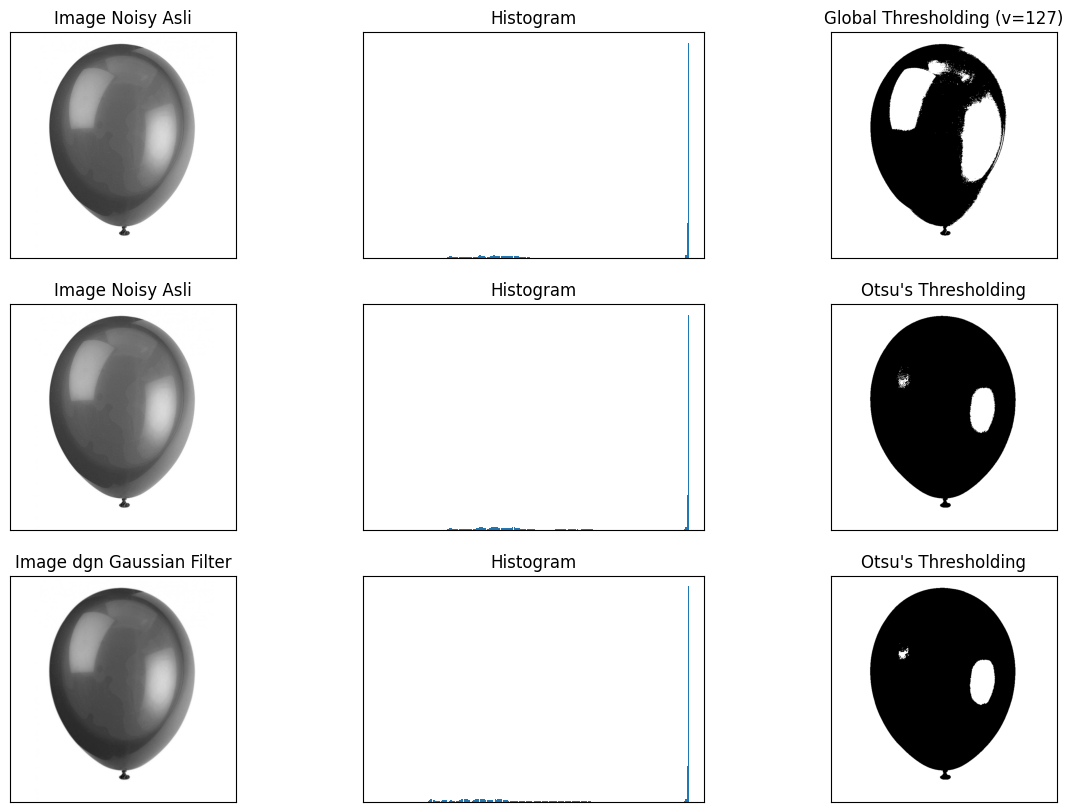

In [12]:
# Threshold Otsu’s tanpa Gaussian Filter dan dengan menggunakan Gaussian Filter.

filename = ('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul10/balloon.jpg')
img = cv.imread(filename, 0)

# Global Thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Image Noisy Asli', 'Histogram', 'Global Thresholding (v=127)',
          'Image Noisy Asli', 'Histogram', "Otsu's Thresholding",
          'Image dgn Gaussian Filter', 'Histogram', "Otsu's Thresholding"]

plt.figure(figsize=(15, 10))
for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
a) anda dapat gunakan cv.calcHist untuk menampilkan histogram.
b) Buka link berikut https:// opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
c) Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

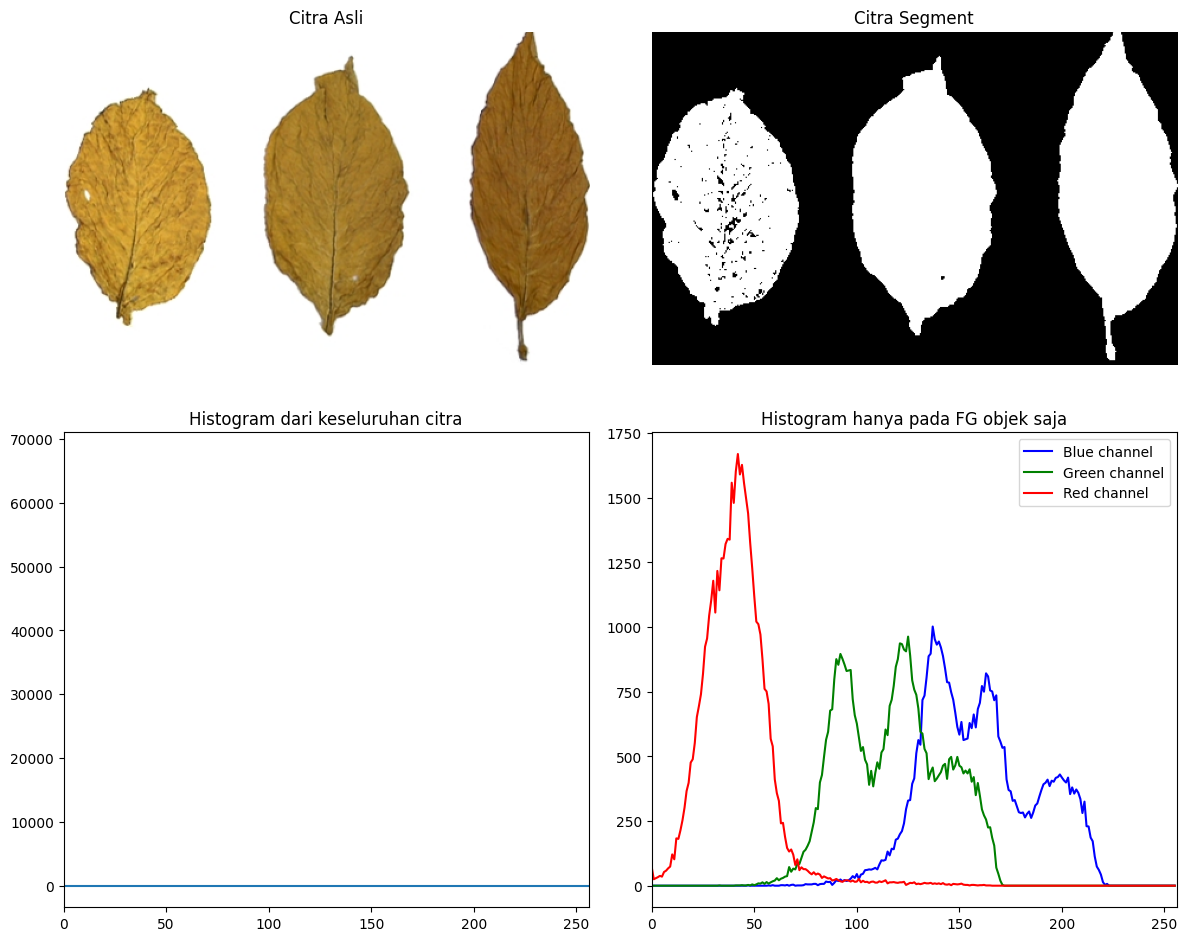

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul10/tobacco.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Segmentasi menggunakan thresholding biner
gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
_, segmented = cv.threshold(gray, 170, 255, cv.THRESH_BINARY_INV)

# Masking foreground untuk objek saja
masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=segmented)

# Menghitung histogram dari keseluruhan citra
hist_full = cv.calcHist([img_rgb], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Menghitung histogram hanya pada foreground (objek saja)
hist_fg_b = cv.calcHist([img_rgb], [0], segmented, [256], [0, 256])
hist_fg_g = cv.calcHist([img_rgb], [1], segmented, [256], [0, 256])
hist_fg_r = cv.calcHist([img_rgb], [2], segmented, [256], [0, 256])

# Plotting hasil
plt.figure(figsize=(12, 10))

# Menampilkan citra asli
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Menampilkan citra hasil segmentasi
plt.subplot(2, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')

# Menampilkan histogram dari keseluruhan citra
plt.subplot(2, 2, 3)
plt.plot(hist_full.flatten())
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Menampilkan histogram dari foreground objek saja
plt.subplot(2, 2, 4)
plt.plot(hist_fg_b, color='b', label='Blue channel')
plt.plot(hist_fg_g, color='g', label='Green channel')
plt.plot(hist_fg_r, color='r', label='Red channel')
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])
plt.legend()

plt.tight_layout()
plt.show()


6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

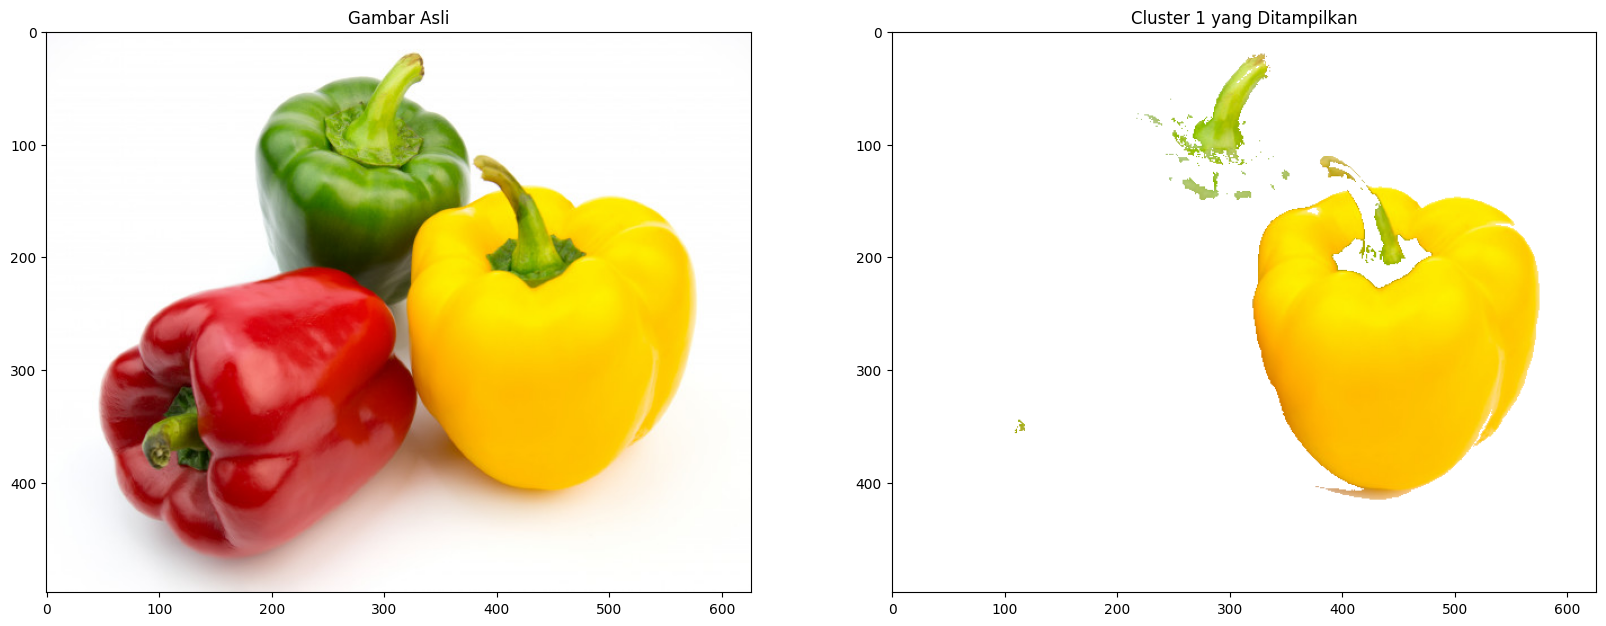

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul10/peppers.jpg')  # Pastikan path ke gambar sesuai
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi gambar menjadi array 2D
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Definisikan kriteria, jumlah cluster (K), dan melakukan K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 3
_, labels, centers = cv.kmeans(pixel_values, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Konversi center menjadi nilai 8-bit
centers = np.uint8(centers)

# Meratakan label menjadi array 1D
labels = labels.flatten()

# Membuat gambar yang telah disegmentasi
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# Reshape labels agar sesuai dengan dimensi gambar asli
labels_reshaped = labels.reshape(img.shape[:2])

# Membuat masker untuk hanya menampilkan cluster tertentu
masked_image = np.copy(img)
cluster_to_show = 1  # Mengubah cluster yang ingin ditampilkan

# Atur semua piksel yang bukan bagian dari cluster yang dipilih menjadi putih
masked_image[labels_reshaped != cluster_to_show] = [255, 255, 255]

# Visualisasi gambar
plt.figure(figsize=(20, 12))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Asli')

# Gambar setelah masking cluster tertentu
plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title(f'Cluster {cluster_to_show} yang Ditampilkan')
plt.show()


7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda.

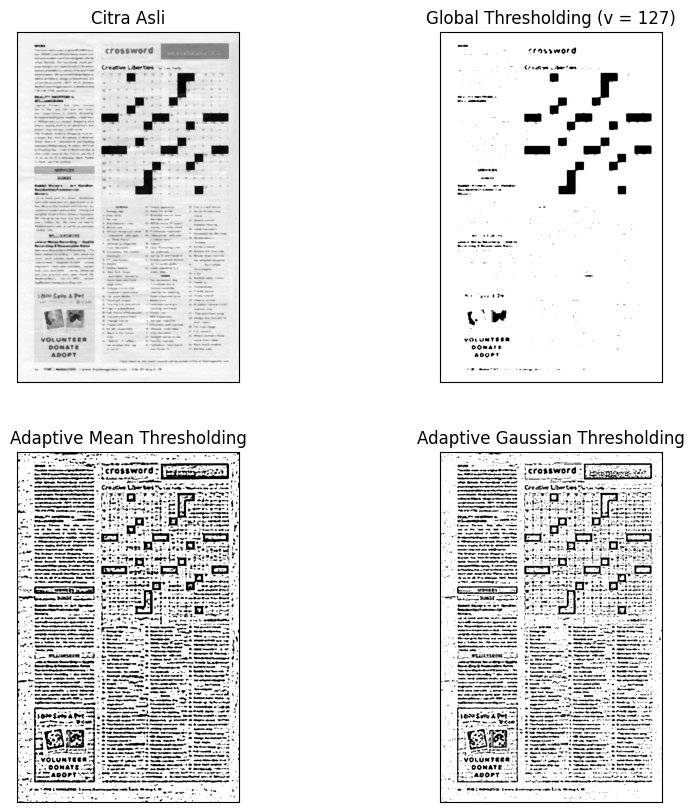

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar sudoku-original
filename = ('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul10/crossword.jpg')
citra = cv.medianBlur(cv.imread(filename), 5)

# Konversi gambar ke grayscale
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

# Global Thresholding (Threshold = 127)
thresh = 127
ret, th1 = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)

# Adaptive Mean Thresholding
th2 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Adaptive Gaussian Thresholding
th3 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Judul untuk masing-masing metode
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

# Citra hasil dari berbagai thresholding
citra2 = [gray, th1, th2, th3]

# Plot hasil
plt.figure(figsize=(10, 10))
for i in range(len(citra2)):
    plt.subplot(2, 2, i + 1), plt.imshow(citra2[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
